# Lecture 19: Convolutional Neural Networks 

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1z6mlOBhDIQQHTkVzYgiVp6CQ-OjoLujm)

In [1]:
import datetime
now = datetime.datetime.now()
print("Version: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Version: 2021-02-26 08:29:33


## This Lecture 

* The basics of CNNs 
* This is a complex and very varied subject (could do a whole course on this alone)

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
def reset_state(seed=42):
    tf.keras.backend.clear_session()
    tf.random.set_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
try:
    import subprocess
    subprocess.run("git config --get remote.origin.url | grep 'astro-informatics'", shell=True, check=True)
    PROJECT_ROOT_DIR = "."
    CHAPTER_ID = "Lecture19_Images"
except: 
    PROJECT_ROOT_DIR = "."
    CHAPTER_ID = ""

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID, fig_id + ".png")
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format='png', dpi=300)
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    
def crop(images):
    return images[150:220, 130:250]
    
import warnings
warnings.filterwarnings('ignore')

## Convolutional Layers in NN 

* Convolutional neural networks (CNNs) emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s.
* Used in image recognition also in voice recognition and natural language processing 
* Local Field of View
* Used to define local features in an image - data compression

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/localFov.jpeg" alt="Drawing" style="width: 500px;"/>



### Why?

* A way of encoding images using a small(er) number of features upon which training (e.g. for classifying images) can take place. 
* Differences in images that enable humans to classify are hypothesise to be extracted in similar ways.

## Convolutional Layers 

* Encode convolutions as a NN 

* Neurons connected to _receptor_ field in next layer that is _smaller_. Uses zero padding to force layers to have same height & width.

* Also can connect large input layer to much smaller layer by spacing out receptor fields (distance between receptor fields is called the _stride_)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/CC.jpeg" alt="Drawing" style="width: 700px;"/>

### Feature Maps 

* Neuron weights can look like small images (w/ size = receptor field)
* Examples given: 1) vertical filter (single vertical bar, mid-image, all other cells zero) 2) horizontal filter (single horizontal bar, mid-image, all other cells zero)
* Both return _feature maps_ (highlights areas of image most similar to filter)


<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/featuremap.jpeg" alt="Drawing" style="width: 800px;"/>

### Stacking Feature Maps 

* More realistic to have several features of similar size i.e. 3D layers 
* A convolutional layer can thereby apply multiple filters to its input and be capable of detecting multiple features 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/stacked.jpeg" alt="Drawing" style="width: 400px;"/>


### Example 

* The following code loads two sample images, using Scikit-Learn’s load_sample_images() (which loads two color images, one of a Chinese temple, and the other of a flower)
* Then it creates two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle), and applies them to both images using a convolutional layer built using TensorFlow’s ${\tt tf.nn.conv2d()}$ function (with zero padding and a stride of 2). 
* Finally, it plots one of the resulting feature maps



In [42]:
#simple example 
from sklearn.datasets import load_sample_image #load images

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters that are 7x7xchannelsx2 arrays
filters = np.zeros(shape=(7, 7, channels, 2),  dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

In [14]:
# Conv2D arguments:
# filters = 4D tensor
# strides = 1D array (1, vstride, hstride, 1)
# padding = VALID = no zero padding, may ignore edge rows/cols
# padding = SAME  = zero padding used if needed
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

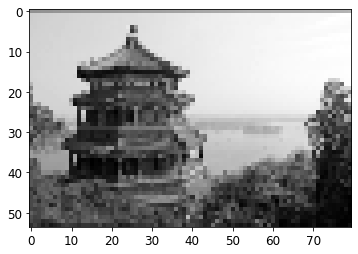

In [44]:
outputs = tf.nn.conv2d(images, filters, strides=8, padding="SAME")

plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map

plt.show()

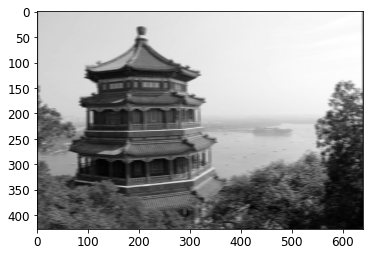

In [26]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map

plt.show()

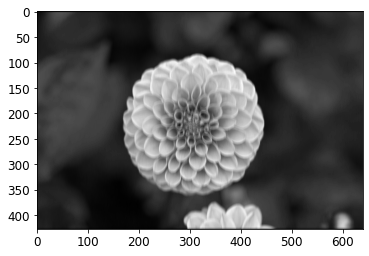

In [24]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[1, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map

plt.show()

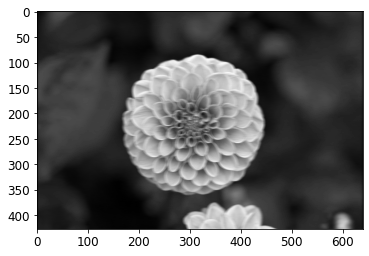

In [19]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map

plt.show()

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/dotproduct-slides.png" alt="Drawing" style="width: 900px;"/>

Note the relation to the dot product 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/example-slides.png" alt="Drawing" style="width: 900px;"/>



<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/6filter-slides.png" alt="Drawing" style="width: 900px;"/>

The convolution layer comprises of a set of independent filters (6 in the example shown). Each filter is independently convolved with the image and we end up with 6 feature maps of shape 28x28x1.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/simpleseries-slides.png" alt="Drawing" style="width: 900px;"/>

All these filters are initialized randomly and become our parameters which will be learned by the network subsequently.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/padding.jpeg" alt="Drawing" style="width: 900px;"/>



In [9]:
reset_state()

filter_primes = np.array([2., 3., 5., 7., 11., 13.], dtype=np.float32)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1, 1, 13, 1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')


print("VALID:\n", valid_conv.numpy())
print("SAME:\n", same_conv.numpy())

VALID:
 [[[[184.]
   [389.]]]]
SAME:
 [[[[143.]
   [348.]
   [204.]]]]


In [7]:
#the above is effectively doing a dot product of the following series with 
#the filters. Note the different behaviour that conv2 adopts in the two cases
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
184.0
389.0
SAME:
143.0
348.0
204.0


## Pooling Layers 

* Goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting). Pooling layer operates on each feature map independently.

* Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. You must define its size, the stride, and the padding type, just like before. 

* However, a pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/pool.jpeg" alt="Drawing" style="width: 900px;"/>

* note image is smaller due to receptive layer size

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/maxpool-slides.png" alt="Drawing" style="width: 900px;"/>



In [8]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [9]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

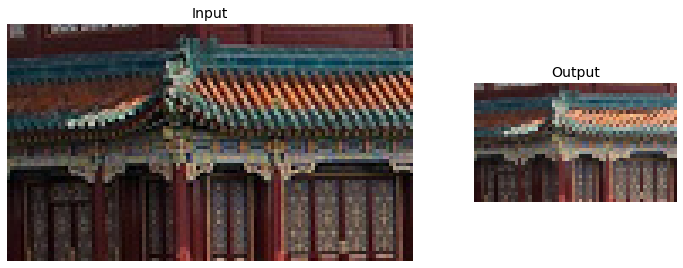

In [10]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()

## CNN Architectures 

* Typical CNN architectures stack a few convolutional layers (each one generally followed by a ReLU layer; max(0,x), then a pooling layer, then another few convolutional layers (+ ReLU), then another pooling layer, and so on.

* The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e., with more feature maps) thanks to the convolutional layers

* At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers, and the final layer outputs the prediction 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/aCNN.jpeg" alt="Drawing" style="width: 1000px;"/>

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/excnn.jpeg" alt="Drawing" style="width: 1500px;"/>



### LeNet

Widely used for MNIST 

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/lenet.jpeg" alt="Drawing" style="width: 500px;"/>



### AlexNet

Used for ImageNet Challenge [http://www.image-net.org/challenges/LSVRC/](http://www.image-net.org/challenges/LSVRC/)

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture19_Images/alexnet.jpeg" alt="Drawing" style="width: 500px;"/>



## Tackling Fashion MNIST With a CNN

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [12]:
from functools import partial  
# What is partial? See https://chriskiehl.com/article/Cleaner-coding-through-partially-applied-functions

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


_**Beware, the cell below will take a long time to run!**_

In [15]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 484s 281ms/step - loss: 1.0357 - accuracy: 0.6352 - val_loss: 0.3549 - val_accuracy: 0.8752
Epoch 2/5
1719/1719 [==============================] - 476s 277ms/step - loss: 0.4430 - accuracy: 0.8537 - val_loss: 0.3218 - val_accuracy: 0.8832
Epoch 3/5
1719/1719 [==============================] - 475s 276ms/step - loss: 0.3656 - accuracy: 0.8759 - val_loss: 0.3184 - val_accuracy: 0.8840
Epoch 4/5
1719/1719 [==============================] - 474s 276ms/step - loss: 0.3160 - accuracy: 0.8935 - val_loss: 0.2975 - val_accuracy: 0.8870
Epoch 5/5
1719/1719 [==============================] - 474s 276ms/step - loss: 0.3040 - accuracy: 0.8960 - val_loss: 0.2773 - val_accuracy: 0.8988


In [16]:
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

313/313 [==============================] - 17s 54ms/step - loss: 0.2911 - accuracy: 0.8965


## ResNet-34

In [17]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [18]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

## No Exercise! 

* Understand the MNIST example above, annotate this yourself and attempt to run it (note it will take some time)  
* Attempt to draw (by hand, or otherwise the CNN architecture) - will not be marked 
* What could you do if you encounter memory problems with this network?